# Plotting with pandas

It is time to learn how to plot with our favorite data wrangling tool : pandas 🐼.

We will be using the open data powering https://www.rte-france.com/eco2mix website. 

The pre-processing of the data has been already done for you. All you need is to learn how read pickles from pandas!

![pickles](https://static.wikia.nocookie.net/rickandmorty/images/4/41/Pickle_rick_transparent_edgetrimmed.png)


## Exercise - setting up our (plotting) environment

In [3]:
# load pandas, matplotlib and setup your environment for bigger figures by default (check matplotlib's "rcParams")
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#ToDo

In [4]:
mpl.rcParams['figure.figsize'] = (8,8)

## Exercise : loading the data from a pickle file

In [6]:
# Load from the pickle file eco2mix
df = pd.read_pickle('/home/dmitrii.druzhbin@Digital-Grenoble.local/Documents/DataViz/notebooks/data/eco2mix.pkl')



df.sample(5) # take 10 samples at random

df_copy = df.copy()
df_copy.head()

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
DateTime,,,,,,,,,,
2016-01-01 00:00:00,Ile-de-France,8885.0,293.0,NaN,18.0,0.0,10.0,NaN,137.0,8428.0
2016-01-01 00:15:00,Ile-de-France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 00:30:00,Ile-de-France,8709.0,309.0,NaN,16.0,0.0,10.0,NaN,148.0,8226.0
2016-01-01 00:45:00,Ile-de-France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00,Ile-de-France,8343.0,309.0,NaN,13.0,0.0,10.0,NaN,149.0,7864.0


In [7]:
df_copy = df_copy.reset_index()

In [8]:
df_copy.head()

,DateTime,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
0,2016-01-01 00:00:00,Ile-de-France,8885.0,293.0,NaN,18.0,0.0,10.0,NaN,137.0,8428.0
1,2016-01-01 00:15:00,Ile-de-France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 00:30:00,Ile-de-France,8709.0,309.0,NaN,16.0,0.0,10.0,NaN,148.0,8226.0
3,2016-01-01 00:45:00,Ile-de-France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 01:00:00,Ile-de-France,8343.0,309.0,NaN,13.0,0.0,10.0,NaN,149.0,7864.0


In [9]:
df_copy['Year'] = pd.to_datetime(df_copy['DateTime']).dt.year

In [10]:
df_copy_nanfix = df_copy.fillna(0)

In [11]:
df_copy_nanfix.head()

,DateTime,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Year
0,2016-01-01 00:00:00,Ile-de-France,8885.0,293.0,0.0,18.0,0.0,10.0,0.0,137.0,8428.0,2016
1,2016-01-01 00:15:00,Ile-de-France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
2,2016-01-01 00:30:00,Ile-de-France,8709.0,309.0,0.0,16.0,0.0,10.0,0.0,148.0,8226.0,2016
3,2016-01-01 00:45:00,Ile-de-France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,2016-01-01 01:00:00,Ile-de-France,8343.0,309.0,0.0,13.0,0.0,10.0,0.0,149.0,7864.0,2016


In [12]:
df_2018 = df_copy_nanfix[df_copy_nanfix.Year == 2018].drop('Pompage',axis=1)
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420480 entries, 70272 to 2243519
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DateTime        420480 non-null  datetime64[ns]
 1   Périmètre       420480 non-null  object        
 2   Consommation    420480 non-null  float64       
 3   Thermique       420480 non-null  float64       
 4   Nucléaire       420480 non-null  float64       
 5   Eolien          420480 non-null  float64       
 6   Solaire         420480 non-null  float64       
 7   Hydraulique     420480 non-null  float64       
 8   Bioénergies     420480 non-null  float64       
 9   Ech. physiques  420480 non-null  float64       
 10  Year            420480 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), object(1)
memory usage: 36.9+ MB


In [13]:
df_2018.columns

Index(['DateTime', 'Périmètre', 'Consommation', 'Thermique', 'Nucléaire',
       'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies', 'Ech. physiques',
       'Year'],
      dtype='object')

In [14]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420480 entries, 70272 to 2243519
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DateTime        420480 non-null  datetime64[ns]
 1   Périmètre       420480 non-null  object        
 2   Consommation    420480 non-null  float64       
 3   Thermique       420480 non-null  float64       
 4   Nucléaire       420480 non-null  float64       
 5   Eolien          420480 non-null  float64       
 6   Solaire         420480 non-null  float64       
 7   Hydraulique     420480 non-null  float64       
 8   Bioénergies     420480 non-null  float64       
 9   Ech. physiques  420480 non-null  float64       
 10  Year            420480 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), object(1)
memory usage: 36.9+ MB


In [15]:
sources_2018 = [df_2018[df_2018.columns[i]].sum() for i in range(3,9)]

In [16]:
sources_2018

[75986264.0, 785967028.0, 56261568.0, 21166093.0, 134815101.0, 19092161.0]

In [17]:
sources_2018_ratio = [round(sources_2018[i]/sum(sources_2018) * 100) for i in range(len(sources_2018))]

In [18]:
sources_2018_ratio

[7, 72, 5, 2, 12, 2]

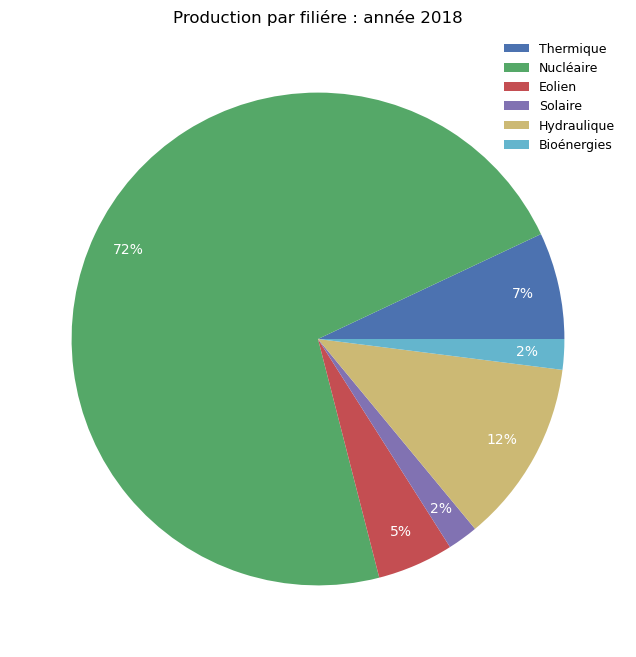

In [19]:
import seaborn as sns

fig = plt.figure()

plt.pie(x = sources_2018_ratio, 
        colors = ['#4C72B0', 
                  '#55A868',
                  '#C44E52',
                  '#8172B2',
                  '#CCB974',
                  '#64B5CD'],
        autopct='%1.f%%',
        pctdistance=0.85,
        textprops={'color':"w"})
plt.legend([df_2018.columns[i] for i in range(3,9)], 
           loc='upper right', 
           fontsize=9, 
           frameon=False)
plt.title('Production par filiére : année 2018')
plt.show()

# Plotting with Matplotlib


##  Exercise -  Pie chart 

Choose a year in the data, and plot the share for each of the different energy sources, for example like this:

<img src="./img/pie.png" width=400px />


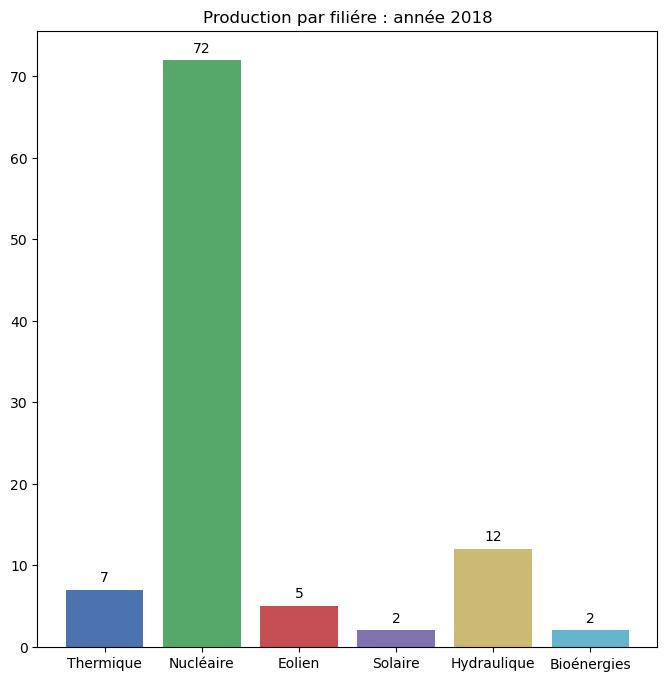

In [21]:
# Choose a year (ex: 2018) and plot the share that each of the different energy sources has in the total energy production:

#ToDo
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+1,y[i],ha = 'center')

plt.bar(x = [df_2018.columns[i] for i in range(3,9)], 
        height=sources_2018_ratio,
        color = ['#4C72B0', 
                  '#55A868',
                  '#C44E52',
                  '#8172B2',
                  '#CCB974',
                  '#64B5CD'])
addlabels([df_2018.columns[i] for i in range(3,9)], [sources_2018_ratio[i] for i in range(len(sources_2018_ratio))])
plt.title('Production par filiére : année 2018')

plt.show()

## Exercise :  Horizontal Bar

Use a horizontal bar chart instead of a pie to represent the previous data

_Tip: When possible, try to replace pie charts with horizontal bar_

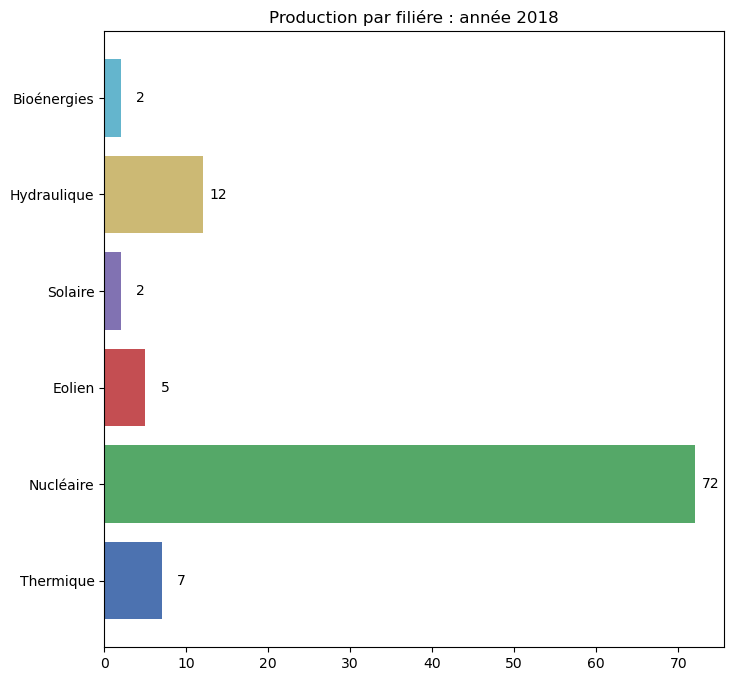

In [23]:
# When thinking about pie charts, give a try to horizontal bars.

#ToDo
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(x[i]+3, i, f'{x[i]}', va='center', ha='right')

plt.barh(y = [df_2018.columns[i] for i in range(3,9)], 
        width=sources_2018_ratio,
        color = ['#4C72B0', 
                  '#55A868',
                  '#C44E52',
                  '#8172B2',
                  '#CCB974',
                  '#64B5CD'])
addlabels([sources_2018_ratio[i] for i in range(len(sources_2018_ratio))], [df_2018.columns[i] for i in range(3,9)])
plt.title('Production par filiére : année 2018')

plt.show()


## Exercise : Area chart

Go ahead and explore trends in the evolution of the energy production with the help of an area chart

In [25]:
df_copy_nanfix['Year'].value_counts()

Year
2016    421632
2018    420480
2017    420480
2013    420480
2015    420480
2014    420480
Name: count, dtype: int64

In [26]:
# Explore trends

#ToDo
def tendency_source(source):
    lst = []
    for i in range(2013,2019):
        lst.append(df_copy_nanfix[df_copy_nanfix.Year == i][source].sum())
    return lst

In [27]:
tendency_source('Thermique')

[87265040.0, 49924365.0, 66714884.0, 88787737.0, 105507116.0, 75986264.0]

In [28]:
data_tendency = pd.DataFrame()

In [29]:
for source in ['Thermique',
               'Nucléaire',
               'Eolien',
               'Solaire',
               'Hydraulique',
               'Bioénergies']:
    data_tendency[source] = tendency_source(source)

In [30]:
data_tendency['Year'] = list(range(2013, 2019))

In [31]:
data_tendency.head(2)

,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Year
0,87265040.0,806802087.0,31665608.0,9008891.0,149129252.0,12227527.0,2013
1,49924365.0,831008785.0,34116918.0,11639659.0,134720263.0,15020879.0,2014


In [32]:
def ratio(source):
    lst = []
    for i in range(len(data_tendency)):
         lst.append(round(data_tendency[source][i] / data_tendency.iloc[i].sum() * 100, 2))
    return lst

In [33]:
for source in ['Thermique',
               'Nucléaire',
               'Eolien',
               'Solaire',
               'Hydraulique',
               'Bioénergies']:
    data_tendency[source+'_ratio'] = ratio(source)

In [34]:
data_tendency.head()

,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Year,Thermique_ratio,Nucléaire_ratio,Eolien_ratio,Solaire_ratio,Hydraulique_ratio,Bioénergies_ratio
0,87265040.0,806802087.0,31665608.0,9008891.0,149129252.0,12227527.0,2013,7.96,73.61,2.89,0.82,13.61,1.12
1,49924365.0,831008785.0,34116918.0,11639659.0,134720263.0,15020879.0,2014,4.64,77.20,3.17,1.08,12.52,1.40
2,66714884.0,832908808.0,42188171.0,14572733.0,117039522.0,15832717.0,2015,6.12,76.47,3.87,1.34,10.74,1.45
3,88787737.0,767408645.0,41835426.0,16521789.0,126717599.0,17423013.0,2016,8.39,72.49,3.95,1.56,11.97,1.65
4,105507116.0,757772631.0,48194982.0,17987913.0,106026436.0,18877342.0,2017,10.01,71.87,4.57,1.71,10.06,1.79


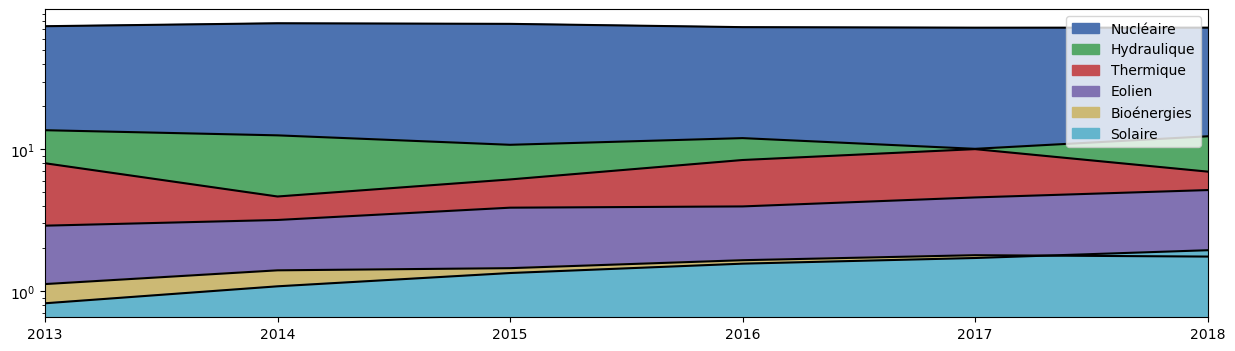

In [35]:
fig = plt.figure(figsize=(15,4))

color = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

plt.fill_between(data_tendency['Year'],data_tendency['Nucléaire_ratio'], color = color[0])
plt.plot(data_tendency['Year'],data_tendency['Nucléaire_ratio'], color = 'black', label='_nolegend_')
plt.fill_between(data_tendency['Year'],data_tendency['Hydraulique_ratio'], color = color[1])
plt.plot(data_tendency['Year'],data_tendency['Hydraulique_ratio'], color = 'black', label='_nolegend_')
plt.fill_between(data_tendency['Year'],data_tendency['Thermique_ratio'], color = color[2])
plt.plot(data_tendency['Year'],data_tendency['Thermique_ratio'], color = 'black', label='_nolegend_')
plt.fill_between(data_tendency['Year'],data_tendency['Eolien_ratio'], color = color[3])
plt.plot(data_tendency['Year'],data_tendency['Eolien_ratio'], color = 'black', label='_nolegend_')
plt.fill_between(data_tendency['Year'],data_tendency['Bioénergies_ratio'], color = color[4])
plt.plot(data_tendency['Year'],data_tendency['Bioénergies_ratio'], color = 'black', label='_nolegend_')
plt.fill_between(data_tendency['Year'],data_tendency['Solaire_ratio'], color = color[5])
plt.plot(data_tendency['Year'],data_tendency['Solaire_ratio'], color = 'black', label='_nolegend_')
plt.xlim(2013,2018)
plt.yscale("log")
plt.legend(['Nucléaire',
               'Hydraulique',
               'Thermique',
               'Eolien',
               'Bioénergies',
               'Solaire'])


plt.show()

## Exercise : Scatter Plot

Scatter plots are helpful to put in evidence relationships between two variables. Can you find a data relationships and make it visible with a plot ?

_Bonus: try Seaborn's joint plots_

In [37]:
# Explore relationships between variables with a scatter plot

#ToDo
df_2018.head()

,DateTime,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Ech. physiques,Year
70272,2018-01-01 00:00:00,Bourgogne-Franche-Comté,2410.0,164.0,0.0,524.0,0.0,224.0,24.0,1475.0,2018
70273,2018-01-01 00:15:00,Bourgogne-Franche-Comté,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
70274,2018-01-01 00:30:00,Bourgogne-Franche-Comté,2290.0,158.0,0.0,513.0,0.0,219.0,28.0,1372.0,2018
70275,2018-01-01 00:45:00,Bourgogne-Franche-Comté,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
70276,2018-01-01 01:00:00,Bourgogne-Franche-Comté,2248.0,160.0,0.0,508.0,0.0,173.0,28.0,1379.0,2018


In [38]:
df_2018.set_index('DateTime').resample('W').sum().head()

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Ech. physiques,Year
DateTime,,,,,,,,,,
2018-01-07,Bourgogne-Franche-ComtéNouvelle-AquitainePays-...,20478865.0,983498.0,17163215.0,2467168.0,85699.0,2944558.0,362885.0,-3118808.0,16273152
2018-01-14,Bourgogne-Franche-ComtéNouvelle-AquitainePays-...,22621130.0,2261558.0,18773179.0,808077.0,131234.0,3212503.0,366922.0,-2624382.0,16273152
2018-01-21,Bourgogne-Franche-ComtéNouvelle-AquitainePays-...,22651238.0,1456277.0,18693420.0,2609817.0,126619.0,3302538.0,362476.0,-3519721.0,16273152
2018-01-28,Bourgogne-Franche-ComtéNouvelle-AquitainePays-...,21541791.0,1549840.0,18875986.0,1504294.0,148602.0,3516267.0,365068.0,-4049364.0,16273152
2018-02-04,Bourgogne-Franche-ComtéNouvelle-AquitainePays-...,22856605.0,2045345.0,18688091.0,1277098.0,177221.0,3445496.0,378007.0,-2815767.0,16273152


In [42]:
df_2018.set_index('DateTime').index[0]

Timestamp('2018-01-01 00:00:00')

In [39]:
# let's use the amazing Seaborn library to plot even more insightfull scatter plots:
import seaborn as sns # make sure you installed the library with pip or conda!

# create a joint plot using Seaborn:
sns.jointplot(data = df_copy_nanfix.set_index('DateTime').resample('W').sum().drop('Périmètre'), x = 'Thermique', y = 'Nucléaire')

KeyError: "['Périmètre'] not found in axis"

In [ ]:
sns.pairplot(data = df_copy_nanfix.set_index('DateTime').drop(['Year','Périmètre']).resample('W').sum(),axis = 1))

# Plotting with Plotly (optional)

In order to go further you can start exploring an alternative ploting library: Plotly.

Two possible ways of using plotly with pandas :
 - https://plotly.com/python/pandas-backend/
 - https://github.com/santosjorge/cufflinks
 - https://coderzcolumn.com/tutorials/data-science/cufflinks-how-to-create-plotly-charts-from-pandas-dataframe-with-one-line-of-code
 
Repeat the previous exercises using the Plotly/Cufflinks backend for Pandas. 

Which library do you prefer ? Which plotly integration works better ?